In [5]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [145]:
import os

# Change to the directory containing your data
data_dir = '/content/drive/My Drive/ML_rruff'
os.chdir(data_dir)

# List the contents of the directory
print(os.listdir())

print("------------")

os.chdir('')
print(os.listdir())


['Untitled0.ipynb', 'XY_Processed', 'EX1', 'Selected']
------------
['Diopside__R060276-1__Powder__Xray_Data_XY_Processed__2637.txt', 'Spessartine__R060447-1__Powder__Xray_Data_XY_Processed__3074.txt', 'Sodalite__R060354-1__Powder__Xray_Data_XY_Processed__4167.txt', 'Cerussite__R040069-1__Powder__Xray_Data_XY_Processed__3324.txt', 'Grossular__R060443-1__Powder__Xray_Data_XY_Processed__3129.txt', 'Fluorapatite__R050274-1__Powder__Xray_Data_XY_Processed__5888.txt', 'Beryl__R060942-1__Powder__Xray_Data_XY_Processed__7334.txt', 'Dolomite__R050272-1__Powder__Xray_Data_XY_Processed__5892.txt', 'Pyrope__R050446-1__Powder__Xray_Data_XY_Processed__5010.txt', 'Spinel__R070013-1__Powder__Xray_Data_XY_Processed__7653.txt', 'Actinolite__R060041-1__Powder__Xray_Data_XY_Processed__2599.txt', 'Forsterite__R060535-1__Powder__Xray_Data_XY_Processed__3639.txt', 'Diopside__R060061-1__Powder__Xray_Data_XY_Processed__2155.txt', 'Spinel__R050184-1__Powder__Xray_Data_XY_Processed__3438.txt', 'Diopside__R06086

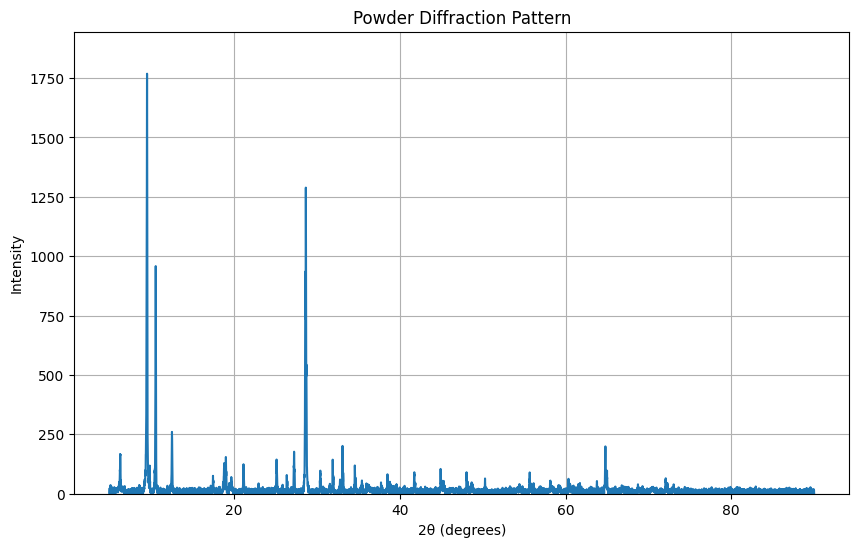

--------------------


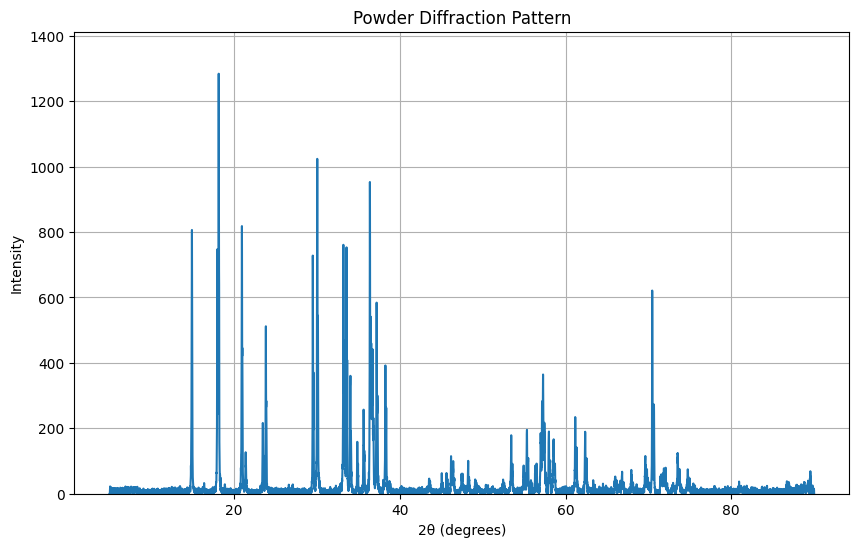

--------------------


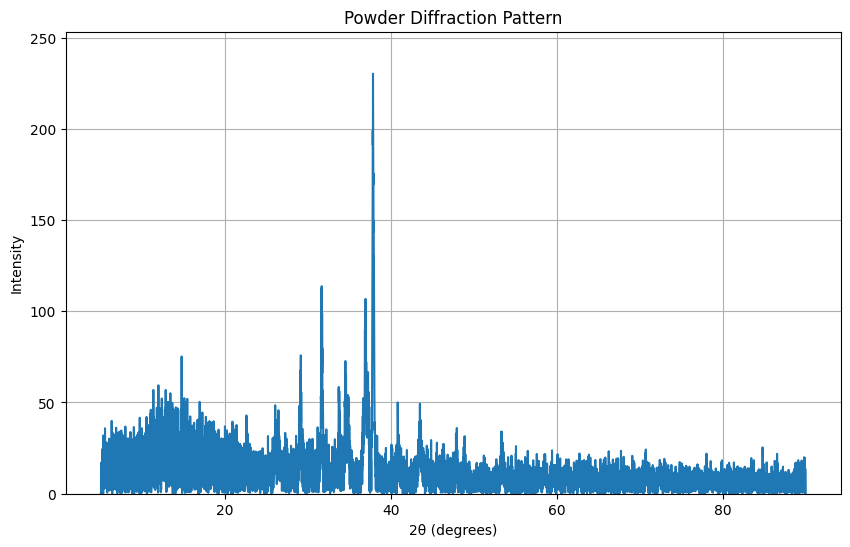

In [52]:
import matplotlib.pyplot as plt
import numpy as np

def get_data(file_path):
    # Read the data from the file
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Extract the data points
    data = []
    metadata = []
    for line in lines:
        if line.startswith('##'):
            metadata.append(line.strip())
        else:
            try:
                x, y = map(float, line.strip().split(','))
                data.append((x, y))
            except ValueError:
                #print(f"Warning: Skipping invalid data: '{line.strip()}'")
                pass

    if not data:
        print("Error: No valid data points found in the file.")
        return



    #print(x_values)

    # Separate x and y values
    x_values, y_values = zip(*data)
    return x_values, y_values



def plot_figure(x_values, y_values):
    # Create the plot
    plt.figure(figsize=(12, 6))
    plt.plot(x_values, y_values)
    plt.xlabel('2θ (degrees)')
    plt.ylabel('Intensity')
    plt.title('Powder Diffraction Pattern')
    plt.grid(True)

    # Add some margin to the y-axis
    y_max = max(y_values)
    plt.ylim(0, y_max * 1.1)

    # Show the plot
    plt.show()

def plot_figure_file(file_path):

    # Get Data
    x_values, y_values = get_data(file_path)

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values)
    plt.xlabel('2θ (degrees)')
    plt.ylabel('Intensity')
    plt.title('Powder Diffraction Pattern')
    plt.grid(True)

    # Add some margin to the y-axis
    y_max = max(y_values)
    plt.ylim(0, y_max * 1.1)

    # Show the plot
    plt.show()

def get_int(x_values, y_values):
    int_x = []
    int_y = []
    for x, y in zip(x_values, y_values):
        if x.is_integer():
            int_x.append(int(x))
            int_y.append(y)
    return int_x, int_y


#------------------------------------------
plot_figure_file('Actinolite.txt')
print("--------------------")
plot_figure_file('Adamite.txt')
print("--------------------")
plot_figure_file('Acanthite.txt')





In [116]:
def get_input(file_path):
    # Read the data from the file
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Extract the data points
    data = []
    metadata = []
    for line in lines:
        if line.startswith('##'):
            metadata.append(line.strip())
        else:
            try:
                x, y = map(float, line.strip().split(','))
                data.append((x, y))
            except ValueError:
                pass

    if not data:
        print("Error: No valid data points found in the file.")
        return



    label = file_path.rstrip('.txt')

    # Separate x and y values
    x_values, y_values = zip(*data)
    y_values = list(y_values)
    return y_values, label


def add_entry(file_path):
  Temp_Y, Temp_L = get_input(file_path)
  DataSet_Y.append(Temp_Y)
  DataSet_Labels.append(Temp_L)
  return DataSet_Y, DataSet_Labels

#------------------------------------------
DataSet_Y = []
DataSet_Labels = []

DataSet_Y, DataSet_Labels = add_entry('Actinolite.txt')
print("--------------------")
print(DataSet_Y)
print(DataSet_Labels)



--------------------
[[0.0, 23.02, 0.104, 10.997, 24.297, 19.683, 19.149, 27.893, 25.472, 21.075, 21.717, 36.39, 14.217, 23.282, 2.994, 15.714, 8.443, 14.18, 25.927, 31.684, 8.792, 9.549, 17.316, 9.092, 0.124, 26.297, 0.926, 3.861, 5.656, 13.46, 11.273, 9.093, 7.921, 10.756, 10.597, 4.444, 6.297, 8.155, 8.018, 2.115, 19.757, 24.634, 10.514, 17.398, 16.286, 20.178, 14.074, 18.973, 20.876, 4.218, 1.692, 6.605, 13.522, 3.441, 26.365, 3.293, 21.225, 18.166, 5.109, 11.054, 26.003, 5.95, 11.903, 19.857, 12.81, 18.765, 17.72, 21.676, 13.632, 13.589, 5.548, 10.509, 4.47, 12.431, 11.394, 15.357, 19.321, 4.286, 13.252, 12.22, 17.187, 9.157, 18.127, 16.098, 14.072, 24.046, 20.021, 21.999, 16.979, 10.963, 22.948, 9.933, 8.92, 16.911, 8.9, 10.889, 9.879, 8.871, 15.87, 7.871, 5.874, 16.876, 19.879, 24.882, 12.889, 18.9, 11.913, 11.927, 24.023, 32.036, 18.051, 27.127, 28.145, 41.479, 48.495, 43.514, 29.532, 49.55, 45.569, 23.588, 53.65, 57.607, 66.46, 95.766, 100.737, 93.712, 160.689, 166.667, 161.64

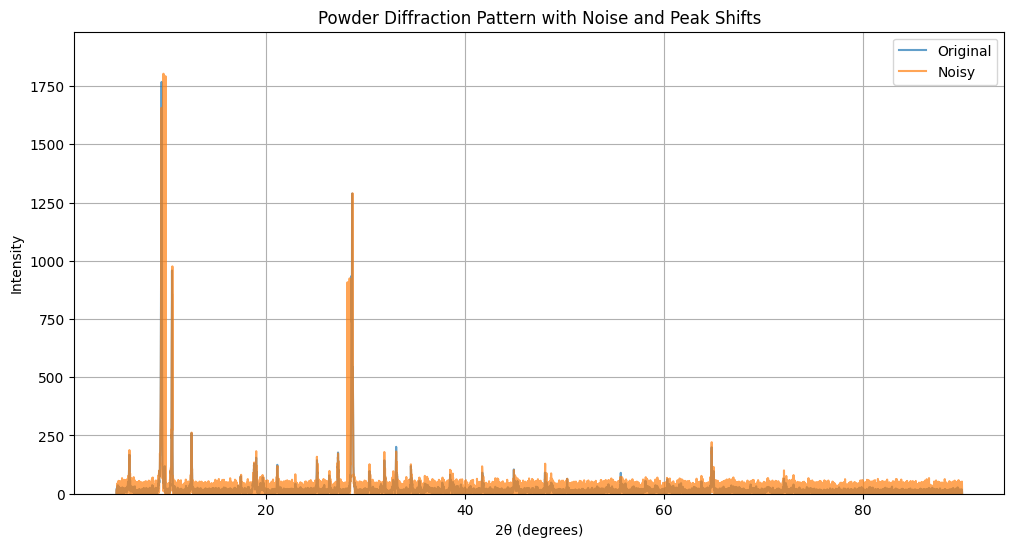

In [94]:
import random
import numpy as np

def create_noise(file_path, intensity_noise=0.1, peak_shift=0.2, peak_threshold=0.5):
    x_values, y_values = get_data(file_path)

    # Identify peaks
    peak_indices = []
    for i in range(1, len(y_values) - 1):
        if y_values[i] > y_values[i-1] and y_values[i] > y_values[i+1] and y_values[i] > peak_threshold * max(y_values):
            peak_indices.append(i)

    noisy_x = list(x_values)
    noisy_y = list(y_values)

    # Shift peaks
    for i in peak_indices:
        shift = random.uniform(-peak_shift, peak_shift)
        noisy_x[i] += shift

        # Adjust neighboring points to maintain peak shape
        if i > 0:
            noisy_x[i-1] += shift * 0.5
        if i < len(noisy_x) - 1:
            noisy_x[i+1] += shift * 0.5

    # Add intensity noise
    for i in range(len(noisy_y)):
        noise = random.uniform(-intensity_noise * max(y_values), intensity_noise * max(y_values))
        noisy_y[i] = max(0, noisy_y[i] + noise)

    # Sort the data points based on x values to maintain order
    noisy_data = sorted(zip(noisy_x, noisy_y), key=lambda x: x[0])
    noisy_x, noisy_y = zip(*noisy_data)

    # Plot the original and noisy data
    plt.figure(figsize=(12, 6))
    plt.plot(x_values, y_values, label='Original', alpha=0.7)
    plt.plot(noisy_x, noisy_y, label='Noisy', alpha=0.7)
    plt.xlabel('2θ (degrees)')
    plt.ylabel('Intensity')
    plt.title('Powder Diffraction Pattern with Noise and Peak Shifts')
    plt.legend()
    plt.grid(True)

    # Add some margin to the y-axis
    y_max = max(max(y_values), max(noisy_y))
    plt.ylim(0, y_max * 1.1)

    plt.show()

    return noisy_x, noisy_y

# Usage
noisy_x, noisy_y = create_noise('Actinolite.txt', intensity_noise=0.025, peak_shift=0.8, peak_threshold=0.5)


In [111]:
from scipy.signal import find_peaks

def create_noise(file_path, n=5, intensity_noise=0.04, peak_shift=1, peak_threshold=0.5):
    x_values, y_values = get_data(file_path)
    x_values = np.array(x_values)
    y_values = np.array(y_values)

    # Identify peaks
    peaks, _ = find_peaks(y_values, height=peak_threshold * np.max(y_values), distance=1)

    noisy_data = []

    for _ in range(n):
        # Create peak shifts
        shifts = np.random.uniform(-peak_shift, peak_shift, size=len(peaks))
        shift_array = np.zeros_like(x_values)
        shift_array[peaks] = shifts

        # Smooth out shifts for neighboring points
        kernel = np.array([0.5, 1, 0.5])
        smoothed_shifts = np.convolve(shift_array, kernel, mode='same') / np.sum(kernel)

        noisy_x = x_values + smoothed_shifts

        # Add intensity noise
        noise = np.random.uniform(-intensity_noise * np.max(y_values),
                                  intensity_noise * np.max(y_values),
                                  size=len(y_values))
        noisy_y = np.maximum(0, y_values + noise)

        # Sort the data points based on x values to maintain order
        sorted_indices = np.argsort(noisy_x)
        noisy_x = noisy_x[sorted_indices]
        noisy_y = noisy_y[sorted_indices]

        noisy_data.append((noisy_x, noisy_y))

    return noisy_data

# Usage
noisy_data = create_noise('Actinolite.txt', n=5, intensity_noise=0.025, peak_shift=0.8, peak_threshold=0.5)
print(len(noisy_data))


5


In [117]:
def plot_noise(file_path, noisy_data):
    # Get original data
    original_x, original_y = get_data(file_path)

    # Create the plot
    plt.figure(figsize=(12, 6))

    # Plot original data
    plt.plot(original_x, original_y, label='Original', alpha=0.7)

    # Plot noisy data
    for i, (noisy_x, noisy_y) in enumerate(noisy_data):
        plt.plot(noisy_x, noisy_y, label=f'Noisy {i+1}', alpha=0.5)

    plt.xlabel('2θ (degrees)')
    plt.ylabel('Intensity')
    plt.title('Powder Diffraction Pattern: Original vs Noisy')
    plt.legend()
    plt.grid(True)

    # Add some margin to the y-axis
    y_max = max(max(original_y), max(max(ny) for _, ny in noisy_data))
    plt.ylim(0, y_max * 1.1)

    plt.show()

# Usage
file_path = 'Adamite.txt'
noisy_data = create_noise(file_path, n=5)  # Assuming create_noise function is defined
print(noisy_data)

[(array([ 5.  ,  5.01,  5.02, ..., 89.98, 89.99, 90.  ]), array([ 0.        , 19.12099389,  8.71705426, ..., 28.60064912,
       20.0747716 ,  0.        ])), (array([ 5.  ,  5.01,  5.02, ..., 89.98, 89.99, 90.  ]), array([50.82235836, 15.22761558, 18.73292055, ..., 38.32104166,
       43.17182077,  0.        ])), (array([ 5.  ,  5.01,  5.02, ..., 89.98, 89.99, 90.  ]), array([ 5.9683789 , 37.62552415,  0.        , ..., 27.39712785,
        0.        ,  0.        ])), (array([ 5.  ,  5.01,  5.02, ..., 89.98, 89.99, 90.  ]), array([47.59076073,  0.        , 15.76666338, ..., 55.759911  ,
       35.62147176, 25.92197489])), (array([ 5.  ,  5.01,  5.02, ..., 89.98, 89.99, 90.  ]), array([ 0.        , 47.47977795,  0.        , ..., 10.18439107,
        0.        ,  0.        ]))]


In [131]:
import numpy as np
import torch

def Create_DataPoint(file_path, n):
    x_values, y_values = get_data(file_path)

    label = file_path.rstrip('.txt')

    # Generate noisy data
    noisy_data = create_noise(file_path, n)

    # Combine original and noisy data
    labels = [label]*(n+1)
    all_y = [np.array(y_values)]
    for _, noisy_y in noisy_data:
        all_y.append(np.array(noisy_y))

    # Convert to tensor
    y_tensor = torch.from_numpy(np.array(all_y)).float()

    return y_tensor, labels

y_tensor, label = Create_DataPoint('Adamite.txt', 5)
print(y_tensor.size())
print(label)

torch.Size([6, 8501])
['Adamite', 'Adamite', 'Adamite', 'Adamite', 'Adamite', 'Adamite']


In [133]:
import numpy as np
import torch

def add_to_dataset(file_path, n, data_tensor, labels_list):
    """
    Adds data from a single file to the larger dataset tensors.

    Args:
    file_path (str): Path to the data file
    n (int): Number of noisy samples to generate
    data_tensor (torch.Tensor): Existing tensor of all data
    labels_list (list): Existing list of all labels

    Returns:
    torch.Tensor: Updated data tensor
    list: Updated labels list
    """
    y_tensor, new_labels = Create_DataPoint(file_path, n)

    # If data_tensor is empty, initialize it with the new data
    if data_tensor is None:
        data_tensor = y_tensor
    else:
        data_tensor = torch.cat((data_tensor, y_tensor), dim=0)

    labels_list.extend(new_labels)

    return data_tensor, labels_list

# Example usage:
data_tensor = None
labels_list = []

# Add data from multiple files
files = ['Adamite.txt', 'Acanthite.txt', 'Actinolite.txt']  # Add your file names here
n_noisy_samples = 5

for file in files:
    data_tensor, labels_list = add_to_dataset(file, n_noisy_samples, data_tensor, labels_list)

print(f"Final data tensor shape: {data_tensor.shape}")
print(f"Number of labels: {len(labels_list)}")
print(f"Unique labels: {set(labels_list)}")


Final data tensor shape: torch.Size([18, 8501])
Number of labels: 18
Unique labels: {'Acanthite', 'Actinolite', 'Adamite'}


In [159]:
import os
import numpy as np
import torch

def get_data(file_path):
    x_values, y_values = [], []
    with open(file_path, 'r') as file:
        for line in file:
            if not line.startswith('#'):
                try:
                    x, y = map(float, line.strip().split(','))
                    x_values.append(x)
                    y_values.append(y)
                except ValueError:
                    pass
    return np.array(x_values), np.array(y_values)

def Create_DataPoint(file_path, n):
    x_values, y_values = get_data(file_path)

    if len(x_values) != 8501:
        return None, None  # Return None if the file doesn't have 8501 data points

    # Extract the molecule name from the filename
    filename = os.path.basename(file_path)
    label = filename.split('__')[0]  # Get the part before the first '__'

    # Generate noisy data
    noisy_data = create_noise(file_path, n)

    # Combine original and noisy data
    labels = [label]*(n+1)
    all_y = [np.array(y_values)]
    for _, noisy_y in noisy_data:
        all_y.append(np.array(noisy_y))

    # Convert to tensor
    y_tensor = torch.from_numpy(np.array(all_y)).float()

    return y_tensor, labels


def process_all_files_in_directory(n=5):
    data_tensor = None
    all_labels = []

    # Get the current working directory
    directory_path = os.getcwd()

    # Get all files with .txt extension in the current directory
    txt_files = [f for f in os.listdir(directory_path) if f.endswith('.txt')]

    for file_name in txt_files:
        file_path = os.path.join(directory_path, file_name)
        y_tensor, labels = Create_DataPoint(file_path, n)

        if y_tensor is not None:
            # Add data to the main tensor
            if data_tensor is None:
                data_tensor = y_tensor
            else:
                data_tensor = torch.cat((data_tensor, y_tensor), dim=0)

            all_labels.extend(labels)

    return data_tensor, all_labels

# Usage
data_tensor, labels = process_all_files_in_directory(n=5)

print(f"Final data tensor shape: {data_tensor.shape}")
print(f"Number of labels: {len(labels)}")
print(f"Unique labels: {len(set(labels))}")


Final data tensor shape: torch.Size([1260, 8501])
Number of labels: 1260
Unique labels: 28


-------------
Diopside


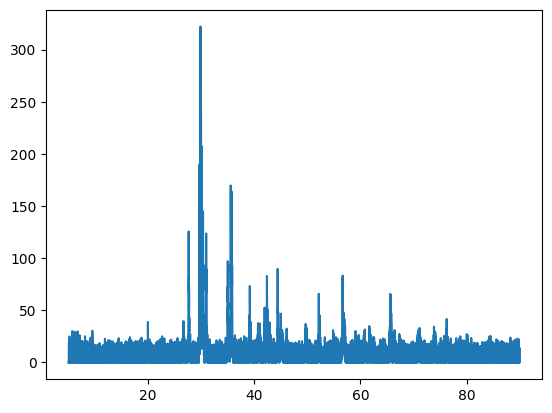

In [162]:
plt.plot(x_values, data_tensor[1])
print("-------------")
print(labels[1])